<a href="https://colab.research.google.com/github/frozenscar/BreastCancerModifiedVGG11/blob/main/Breast_Cancer_Modified_vgg11_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/ds"

'archive (5).zip'


In [ ]:
!unzip "/content/drive/My Drive/ds/archive (5).zip"

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [ ]:
import pandas as pd

In [ ]:
im_df = pd.read_csv('csv/dicom_info.csv')
im_df = im_df[["image_path","SeriesInstanceUID"]]

In [ ]:
im_df.SeriesInstanceUID[10]

'1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265'

In [ ]:
mass_df = pd.read_csv('csv/mass_case_description_train_set.csv')
mass_df["SeriesInstanceUID"] = mass_df["image file path"].str.split('/').str[2]
#mass_df = mass_df[["pathology","SeriesInstanceUID"]]
mass_df['breast density'] = mass_df['breast_density']
mass_df = mass_df.drop(columns=['patient_id','image file path', 'cropped image file path','ROI mask file path','mass shape','mass margins','breast_density'])


mass_df_test = pd.read_csv('csv/mass_case_description_test_set.csv')
mass_df_test["SeriesInstanceUID"] = mass_df_test["image file path"].str.split('/').str[2]
#mass_df = mass_df[["pathology","SeriesInstanceUID"]]
mass_df_test['breast density'] = mass_df_test['breast_density']
mass_df_test = mass_df_test.drop(columns=['patient_id','image file path', 'cropped image file path','ROI mask file path','mass shape','mass margins','breast_density'])


In [ ]:
mass_df.isna().sum()
mass_df_test.isna().sum()

left or right breast    0
image view              0
abnormality id          0
abnormality type        0
assessment              0
pathology               0
subtlety                0
SeriesInstanceUID       0
breast density          0
dtype: int64

In [ ]:
calc_df = pd.read_csv('csv/calc_case_description_train_set.csv')
calc_df["SeriesInstanceUID"] = calc_df["image file path"].str.split('/').str[2]
calc_df = calc_df.drop(columns=['patient_id','image file path', 'cropped image file path','ROI mask file path','calc type', 'calc distribution'])
# calc_df = calc_df[["pathology","SeriesInstanceUID"]]

calc_df_test = pd.read_csv('csv/calc_case_description_test_set.csv')
calc_df_test["SeriesInstanceUID"] = calc_df_test["image file path"].str.split('/').str[2]
calc_df_test = calc_df_test.drop(columns=['patient_id','image file path', 'cropped image file path','ROI mask file path','calc type', 'calc distribution'])

In [ ]:
calc_df.isna().sum()
calc_df_test.isna().sum()

breast density          0
left or right breast    0
image view              0
abnormality id          0
abnormality type        0
assessment              0
pathology               0
subtlety                0
SeriesInstanceUID       0
dtype: int64

In [ ]:
ims_labels_calc = pd.merge(calc_df,im_df,"inner",on="SeriesInstanceUID")
ims_labels_mass = pd.merge(mass_df,im_df,"inner",on="SeriesInstanceUID")

ims_labels_calc_test = pd.merge(calc_df_test,im_df,"inner",on="SeriesInstanceUID")
ims_labels_mass_test = pd.merge(mass_df_test,im_df,"inner",on="SeriesInstanceUID")

In [ ]:
trainset_combined = pd.concat([ims_labels_mass,ims_labels_calc],axis=0,ignore_index=True)


testset_combined = pd.concat([ims_labels_mass_test,ims_labels_calc_test],axis=0,ignore_index=True)


In [ ]:
image_dir = 'jpeg'
trainset_combined['images_dir'] = trainset_combined['image_path'].replace('CBIS-DDSM/jpeg', image_dir, regex=True)
testset_combined['images_dir'] = testset_combined['image_path'].replace('CBIS-DDSM/jpeg',image_dir,regex=True)

In [ ]:
import numpy as np

print(trainset_combined.isna().sum())
print(trainset_combined['left or right breast'].unique())
print(trainset_combined['image view'].unique())
print(trainset_combined['abnormality id'].unique())
print(trainset_combined['abnormality type'].unique())
print(trainset_combined['assessment'].unique())
print(trainset_combined['pathology'].unique())
print(trainset_combined['subtlety'].unique())
print(trainset_combined['breast density'].unique())



print(testset_combined.isna().sum())
print(testset_combined['left or right breast'].unique())
print(testset_combined['image view'].unique())
print(testset_combined['abnormality id'].unique())
print(testset_combined['abnormality type'].unique())
print(testset_combined['assessment'].unique())
print(testset_combined['pathology'].unique())
print(testset_combined['subtlety'].unique())
print(testset_combined['breast density'].unique())




left or right breast    0
image view              0
abnormality id          0
abnormality type        0
assessment              0
pathology               0
subtlety                0
SeriesInstanceUID       0
breast density          0
image_path              0
images_dir              0
dtype: int64
['LEFT' 'RIGHT']
['CC' 'MLO']
[1 2 3 4 5 6 7]
['mass' 'calcification']
[4 3 5 2 0 1]
['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']
[4 3 5 1 2 0]
[3 2 1 4]
left or right breast    0
image view              0
abnormality id          0
abnormality type        0
assessment              0
pathology               0
subtlety                0
SeriesInstanceUID       0
breast density          0
image_path              0
images_dir              0
dtype: int64
['LEFT' 'RIGHT']
['CC' 'MLO']
[1 2 4 3 5]
['mass' 'calcification']
[5 4 0 3 2 1]
['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']
[5 4 2 3 1]
[4 2 3 1 0]


In [ ]:
from PIL import Image
print(trainset_combined['pathology'][0])
with Image.open(trainset_combined['images_dir'][5]) as img:
    img = img.resize((1000,1000))
    #display(img)


#trainset_combined = trainset_combined[trainset_combined!='BENIGN_WITHOUT_CALLBACK']

MALIGNANT


In [ ]:
# Taking onehot for few
import torch
dense_ips_list = []
for i in trainset_combined.iterrows():
  dense_ips = []

  if i[1]['left or right breast'] == 'RIGHT':
    dense_ips.append(1)
  else:
    dense_ips.append(0)

  if i[1]['image view'] == 'CC':
    dense_ips.append(1)
  else:
    dense_ips.append(0)

  dense_ips.append((i[1]['abnormality id'])/10)

  if i[1]['abnormality type'] == 'mass':
    dense_ips.append(1)
  else:
    dense_ips.append(0)

  dense_ips.append((i[1]['subtlety'])/10)
  dense_ips.append(i[1]['assessment']/10)
  dense_ips.append(i[1]['breast density']/10)
  dense_ips = torch.tensor(dense_ips,dtype=torch.float32)
  dense_ips_list.append(dense_ips)

trainset_combined['dense_ips'] = dense_ips_list

print(trainset_combined['dense_ips'].head(2))
print(trainset_combined['dense_ips'][1].shape)

dense_ips_list = []
for i in testset_combined.iterrows():
  dense_ips = []

  if i[1]['left or right breast'] == 'RIGHT':
    dense_ips.append(1)
  else:
    dense_ips.append(0)

  if i[1]['image view'] == 'CC':
    dense_ips.append(1)
  else:
    dense_ips.append(0)

  dense_ips.append((i[1]['abnormality id'])/10)

  if i[1]['abnormality type'] == 'mass':
    dense_ips.append(1)
  else:
    dense_ips.append(0)

  dense_ips.append((i[1]['subtlety'])/10)
  dense_ips.append(i[1]['assessment']/10)
  dense_ips.append(i[1]['breast density']/10)
  dense_ips = torch.tensor(dense_ips,dtype=torch.float32)
  dense_ips_list.append(dense_ips)
testset_combined['dense_ips']=dense_ips_list

0    [tensor(0.), tensor(1.), tensor(0.1000), tenso...
1    [tensor(0.), tensor(0.), tensor(0.1000), tenso...
Name: dense_ips, dtype: object
torch.Size([7])


In [ ]:
import torch

class Cust_DS(torch.utils.data.Dataset):
    def __init__(self,df,transform=None):
        self.df = df
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        dense_ips = self.df['dense_ips'][idx]

        img_path = self.df['images_dir'][idx]
        label = self.df["pathology"][idx]
        im = None
        with Image.open(img_path) as img:

            if self.transform:
                im = self.transform(img)
            else:
                im = img.resize((500,500))

        if label == 'BENIGN':
            label = 0
        elif label == 'MALIGNANT':
            label = 1
        else:
            label = 2
        return [im,dense_ips],label

In [ ]:
from torchvision import transforms
from torch.utils.data import Subset, DataLoader

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229]),
])

dataset = Cust_DS(trainset_combined,transform=transform)
test_dataset = Cust_DS(testset_combined,transform=transform)

# Split dataset into training and validation sets
total_size = len(dataset)
val_size = int(0.2 * total_size)  # 20% for validation
train_size = total_size - val_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [ ]:
dataset[0][0][1]
test_dataset[0][0][1]

tensor([0.0000, 1.0000, 0.1000, 1.0000, 0.5000, 0.5000, 0.4000])

In [ ]:
from torch import nn

In [ ]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
num_class=3
from torchvision.models import vgg16,VGG16_Weights,vgg11
# Define a custom VGG16 model to accept single-channel images
class CustomVGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(CustomVGG16, self).__init__()
        # Load the pre-trained VGG16 model
        vgg16_ = vgg11(pretrained=True)
        # Modify the first layer to accept single-channel images
        self.features = vgg16_.features
        self.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.avgpool = vgg16_.avgpool
        self.classifier = vgg16_.classifier
        self.classifier[-1] = nn.Linear(4096, num_classes)

    def forward(self, ip):
        x = ip[0]
        dense_ips = ip[1]

        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

vgg16_ = CustomVGG16()

vgg16_.classifier[-1] = nn.Linear(4096, num_class)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:05<00:00, 94.5MB/s]


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import vgg11
from PIL import Image

class CustomVGG16(nn.Module):
    def __init__(self, num_classes=1000, num_dense_features=5):
        super(CustomVGG16, self).__init__()
        # Load the pre-trained VGG16 model
        vgg16_ = vgg11(pretrained=True)
        # Modify the first layer to accept single-channel images
        self.features = vgg16_.features
        self.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.avgpool = vgg16_.avgpool
        self.classifier = vgg16_.classifier
        self.classifier[-1] = nn.Linear(4096, 4096)

        # Additional dense features processing layer
        self.dense_features_layer = nn.Sequential(
            nn.Linear(num_dense_features, 64),  # Adjust output size as needed
            nn.ReLU(inplace=True),
            nn.Linear(64, 64),  # Adjust output size as needed
            nn.ReLU(inplace=True)
        )

        # Final classification layer
        self.final_classifier = nn.Linear(4096 + 64, num_classes)

    def forward(self, inputs):
        x = inputs[0]  # Image data
        dense_ips = inputs[1]  # Dense features

        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)


        # Process dense features
        dense_features_processed = self.dense_features_layer(dense_ips)

        # Concatenate processed dense features with CNN features
        x = torch.cat((x, dense_features_processed), dim=1)

        # Final classification
        x = self.final_classifier(x)
        return x

# Example usage:
# Create an instance of CustomVGG16
num_classes = 3  # Adjust according to your problem
num_dense_features = 7 # Adjust based on the number of dense features
vgg16_Model = CustomVGG16(num_classes=num_classes, num_dense_features=num_dense_features)

# Note: Ensure that your input data structure matches the expected format: [image_data, dense_features]
# Then pass this input data to your model for inference.


In [ ]:
vgg16_Model.load_state_dict(torch.load("/content/vgg11_model.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_Model.to(device)

CustomVGG16(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [ ]:
vgg16_Model.final_classifier.out_features = 2


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16_.parameters(), lr=0.01)

In [ ]:
num_epochs = 10  # You can adjust this
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_.to(device)
optimizer = torch.optim.Adam(vgg16_.parameters(), lr=0.01)

val_accuracies = []
train_losses = []

for epoch in range(num_epochs):
    vgg16_.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs[0],inputs[1], labels = inputs[0].to(device),inputs[1].to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16_(inputs)
        loss = criterion(outputs, labels)
        print(loss)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs[0].size(0)

    epoch_loss = running_loss / len(train_dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}")

    train_losses.append(epoch_loss)

    # Evaluate on validation set

    # Step 6: Evaluation
    vgg16_.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs[0],inputs[1], labels = inputs[0].to(device),inputs[1].to(device), labels.to(device)
            outputs = vgg16_(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    val_accuracies.append(val_accuracy)


tensor(0.6462, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8220, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5823, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0125, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3943, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9787, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9968, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7806, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9339, device='cuda:0', grad_fn=

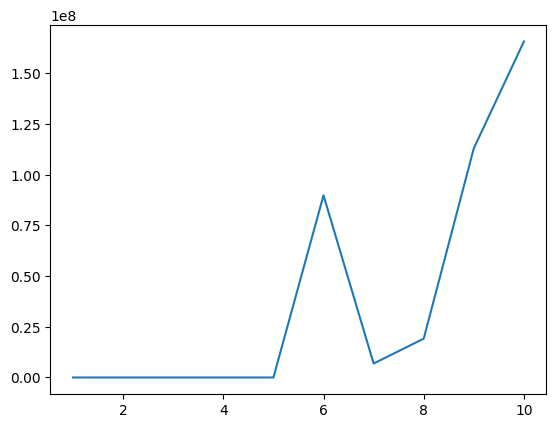

In [ ]:
import matplotlib.pyplot as plt


plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')

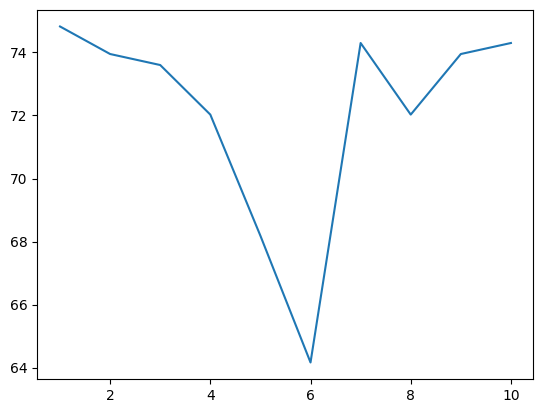

In [ ]:
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')

In [ ]:

vgg16_.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(train_loader):
        inputs[0],inputs[1], labels = inputs[0].to(device),inputs[1].to(device), labels.to(device)
        outputs = vgg16_(inputs)
        _, predicted = torch.max(outputs, 1)
        if i == 0:
            print("Predicted:", predicted[:10])
            print("Labels:", labels[:10])
            break


Predicted: tensor([0, 0, 1, 2, 2, 2, 0, 2, 0, 0], device='cuda:0')
Labels: tensor([0, 1, 1, 2, 2, 2, 0, 2, 1, 0], device='cuda:0')


In [ ]:

# Calculate training and validation accuracy
train_correct = 0
train_total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs[0],inputs[1], labels = inputs[0].to(device),inputs[1].to(device), labels.to(device)
        outputs = vgg16_(inputs)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

train_accuracy = 100 * train_correct / train_total
print(f"Train Accuracy: {train_accuracy:.2f}%")

val_correct = 0
val_total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs[0],inputs[1], labels = inputs[0].to(device),inputs[1].to(device), labels.to(device)
        outputs = vgg16_(inputs)
        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

val_accuracy = 100 * val_correct / val_total
print(f"Validation Accuracy: {val_accuracy:.2f}%")


Train Accuracy: 71.34%
Validation Accuracy: 74.30%


In [ ]:
torch.save(vgg16_.state_dict(), 'vgg11_modelx.pth')
torch.save(optimizer.state_dict(), 'vgg11_optimizerx.pth')

In [ ]:
torch.save(vgg16_, 'vgg11_model11.pkl')


In [ ]:
torch.save({'epoch':25,'model_state_dict':vgg16_.state_dict(),'optimizer_state_dict':optimizer.state_dict()}, 'vgg11_checkpoint.pt')

In [ ]:
from torchsummary import summary
print(vgg16_)

CustomVGG16(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [ ]:
# prompt: give confusion matrix

from sklearn.metrics import confusion_matrix

# Get predictions and true labels
predictions = []
true_labels = []

# Iterate over the validation set
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs[0],inputs[1], labels = inputs[0].to(device),inputs[1].to(device), labels.to(device)
        outputs = vgg16_(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predictions)
print(cm)


[[203  10   5]
 [120 120   0]
 [ 12   0 102]]
